## Redemption Decay Functions for Reconciliation Estimation

DATASET CONSTRUCTION INFORMATION


This file describes the creation of the initial dataset used to model coupon redemption for Bayer.
The process was done in Alteryx.
Monthly finance reports were provided by Bayer. Each report contained a list of coupons, issue dates,
and redemption numbers. The reports were combined into one large dataset. Only coupons with data
greater than 30 days since issue were included. Three variables, two final and one intermediate, were created.

1. Sum_PERIOD-QTY: contained the sum total of redemptions for each coupon for all periods.
2. Total_Dist_Percent: each period's redemption per coupon divided by the Sum-Period-QTY.
3. Days_Since_Issue: calculated the number of days since coupon issue.

Variables 2 and 3 were used in the Python program.

NOTE: the data provided was monthly. This prevented modeling the first few weeks of any given coupon, meaning coupon forecasting
is only possible after 30 days. Also, after filtering criteria, some coupon types did not have enough samples for accurate modeling,
and were either grouped together by similarity or defaulted to Budget Cost Life.

In [54]:
# This program uses MiniConda Python 3.6
%matplotlib inline

# !pip install numdifftools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import numdifftools as nd
from scipy.optimize import curve_fit as cf

In [55]:
# from google.colab import drive
# drive.mount('/content/drive')

In [56]:
def func(x, a, b):
    return a * np.exp(-b * (x))


def output(x, y, p0):
    popt, pcov = cf(func, x, y, p0)
    # perr = np.sqrt(np.diag(pcov))
    a = np.round(popt[0], 5)
    b = np.round(popt[1], 5)
    r_squared(x, y, a, b)
    plot_curve(x, y, a, b)
    return a, b


In [57]:

def r_squared(x, y, a, b):
    res = y - func(x, a, b)
    ss_r = np.sum(res ** 2)
    ss_tot = np.sum((y - np.mean(y) ** 2))
    r_sq = np.round((1 - (ss_r / ss_tot)), 4)
    print(f'R^2 = {r_sq}')
    print(f'Curve Formula: y={a}*exp^(-{b}*(x)')


def plot_curve(x, y, a, b):
    x_est = np.arange(min(x), max(x))
    y_est = func(x_est, a, b)
    plt.figure(figsize=(8,8))
    plt.scatter(x, a*np.exp(-b*x), s=12)
    plt.plot(x_est, y_est, '--', color='red')
    plt.show()


In [58]:
# Load Bayer Curves
# Data has media type to break into appropriate groups and run curves
# all_coupons = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Bayer_Q4_2.csv')
all_coupons = pd.read_csv('C:/Users/norri/Desktop/Bayer/Bayer_Exponential_Build.csv')
p0 = [1.0, .05]

Sunday FSI R^2 & Fit Chart
R^2 = 0.9206
Curve Formula: y=0.08781*exp^(-0.00134*(x)


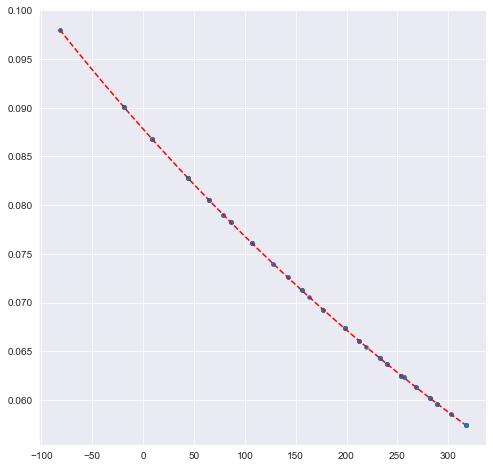

In [59]:
#Sunday FSI Curve
sun_fsi = all_coupons[all_coupons["Media_Type"] == "Sunday Fsi"]
np_sun_fsi = sun_fsi[['Time_Since_Issue', 'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_sun_fsi[:, 0]
y = np_sun_fsi[:, 1]

print('Sunday FSI R^2 & Fit Chart')
a, b = output(x, y, p0)

Paperless R^2 & Fit Chart
R^2 = 0.4175
Curve Formula: y=1.02963*exp^(-0.00124*(x)


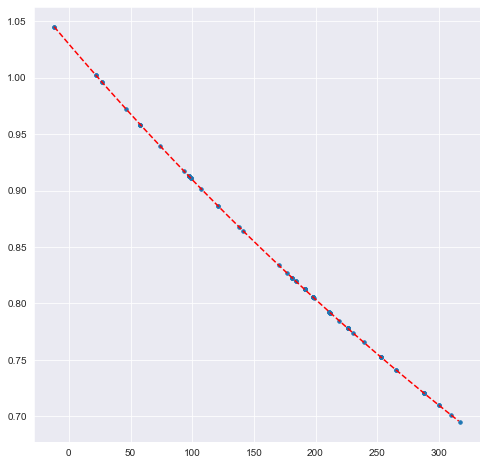

In [60]:
#@title
# Paperless Curve
paperless = all_coupons[all_coupons["Media_Type"] == "Paperless"]
np_paperless = paperless[['Time_Since_Issue',
                          'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paperless[:, 0]
y = np_paperless[:, 1]

print('Paperless R^2 & Fit Chart')
a, b = output(x, y, p0)

Paperless + Print Group R^2 & Fit Chart
R^2 = 0.2947
Curve Formula: y=0.80895*exp^(--0.00024*(x)


C:\Users\norri\AppData\Local\Temp\ipykernel_1748\4051671385.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * (x))


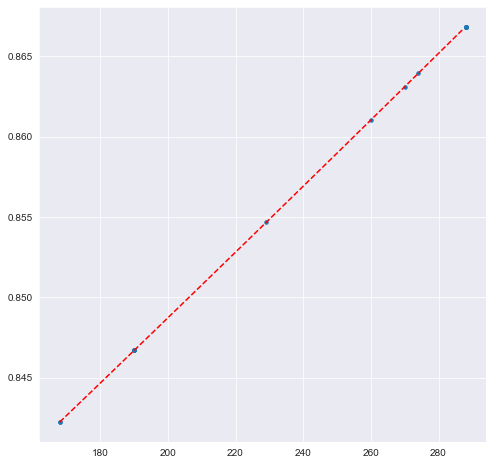

In [61]:
#@title
# Paperless + Print At Home, Print at Home, Paperless + Print at Home Curve

paper_print = all_coupons[all_coupons["Media_Type"].isin(["Paperless + Print at Home",
                                                          "Print At Home",
                                                          "Paperless + Print at Home + Handout"])]

np_paper_print = paper_print[['Time_Since_Issue', 'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paper_print[:, 0]
y = np_paper_print[:, 1]

print('Paperless + Print Group R^2 & Fit Chart')
a, b = output(x, y, p0)

Handout Group R^2 & Fit Chart
R^2 = 0.3151
Curve Formula: y=0.95091*exp^(-0.00055*(x)


C:\Users\norri\AppData\Local\Temp\ipykernel_1748\4051671385.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * (x))


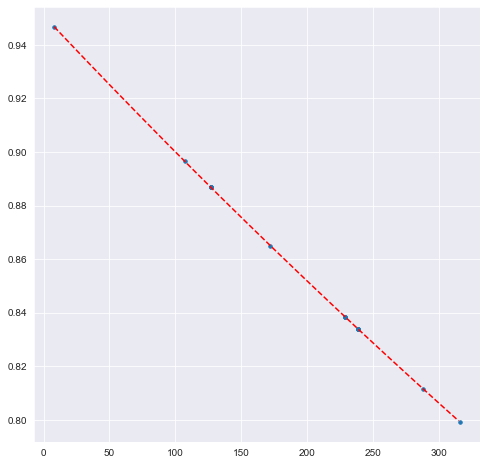

In [62]:
#@title
# HANDOUT, HANDOUT IN-STORE, HANDOUT IN-STORE DISPLAY, HANDOUT IN-STORE TEARPAD,
# HANDOUT SHELF DISPENSER, HANDOUT WITH SAMPLE, INSTANT ON-PACK,
# INSTANT ON-PACK FACTORY APPLIED, ON-PACK

handout = all_coupons[all_coupons["Media_Type"].
isin(["Handout", "Handout In-Store",
      "Handout In-Store Display",
      "Handout In-Store Tearpad",
      "Handout Shelf Dispenser",
      "Handout With Samole", "Instant On-Pack",
      "On-Pack"])]

np_handout = handout[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_handout[:, 0]
y = np_handout[:, 1]

print('Handout Group R^2 & Fit Chart')
a, b = output(x, y, p0)

In [63]:
# #@title
# # All Other: MISCELLANEOUS MEDIA, DIRECT MAIL, DIRECT MAIL SOLO
#
# misc = all_coupons[all_coupons["Media_Type"].isin(["Miscellaneous Media",
#                                                     "Direct Mail Solo",
#                                                     "Direct Mail"])]
#
# np_misc = misc[['Time_Since_Issue',
#                 'Total_Dist_Percent']].to_numpy(dtype=float)
#
# x = np_misc[:, 0]
# y = np_misc[:, 1]
#
# print('All Other Group R^2 & Fit Chart')
# a, b = output(x, y, p0)
